# Summary

This notebook is used to compare how different window sizes affect visualization.

# Libraries

In [72]:
import sys

sys.path.append("../")

from src.convex_combination import ConvexCombination

# Preparation

## Dataset

In [73]:
from river.datasets import synth

stream1 = synth.Sine(classification_function=2, balance_classes=True, has_noise=True)
stream2 = synth.Sine(classification_function=3, balance_classes=True, has_noise=True)
dataset = (synth.ConceptDriftStream(stream1, stream2, position=2500, width=25))
class_list = [0, 1]
n_samples = 7000

## Models

In [74]:
from river import tree
from river import preprocessing, optim, linear_model

model1 = tree.HoeffdingTreeClassifier(delta=1e-07, max_depth=25)

model2 = tree.HoeffdingAdaptiveTreeClassifier(delta=1e-07, max_depth=25)

model3 = preprocessing.StandardScaler() | linear_model.LogisticRegression(optimizer=optim.SGD(0.1))

model_list = [model1, model2, model3]
n_models = len(model_list)

## Metrics

In [75]:
# Lists for storing predictions
y_true_list = []
y_pred_list = []

for i in range(n_models):
    y_pred_list.append([])

In [76]:
# Metrics
from river import metrics, utils

n_metrics = 3

metrics_list = []
metrics_cum_list = []

for i in range(n_models):
    model_metrics = [metrics.Accuracy(), utils.Rolling(metrics.Accuracy(), 1000), utils.Rolling(metrics.Accuracy(), 250)]

    metrics_list.append(model_metrics)
    metrics_cum_list.append([[] for _ in range(n_metrics)])

# Execution

In [77]:
# Generic loop storing predictions
for x, y in dataset.take(n_samples):
    for i in range(n_models):
        # Predict and update the model
        y_pred = model_list[i].predict_one(x)
        model_list[i].learn_one(x, y)

        # Store prediction
        y_pred_list[i].append(y_pred)
    
    # Store true prediction
    y_true_list.append(y)

In [78]:
# Convert predictions to metrics
for i in range(n_models):
    for idx in range(len(y_true_list)):
        y = y_true_list[idx]
        y_pred = y_pred_list[i][idx]
        # Update the metrics
        for j in range(n_metrics):
            try:
                metrics_list[i][j].update(y, y_pred)
            except:
                metrics_list[i][j].update(y, class_list[0])
                print("ERROR")
            metrics_cum_list[i][j].append(metrics_list[i][j].get())

# Plotting

Executed 2023-08-27 13:44:15.650943


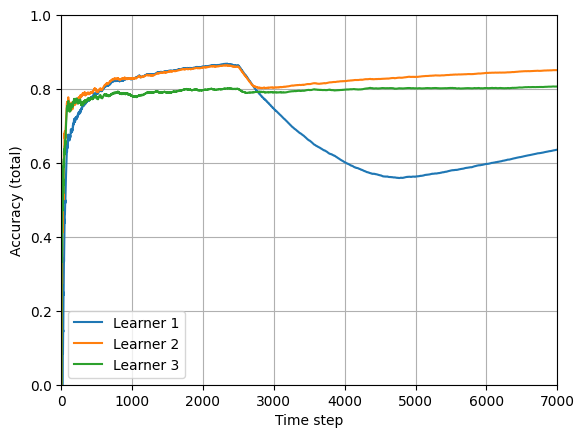

In [79]:
from datetime import datetime
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
for i in range(n_models):
    ax.plot(range(1, n_samples + 1), metrics_cum_list[i][0], label=f"Learner {i+1}")
    # ax.plot(range(1, n_samples + 1), metrics_cum_list[i][1], label=f"Window Accuracy {i+1}")
ax.set_xlim(0, n_samples)
ax.set_ylim(0, 1)
ax.set_xlabel("Time step")
ax.set_ylabel("Accuracy (total)")
#ax.set_title("Graph title")
ax.legend()
ax.grid()
#fig.show()
print(f"Executed {datetime.now()}")

Executed 2023-08-27 13:45:02.145832


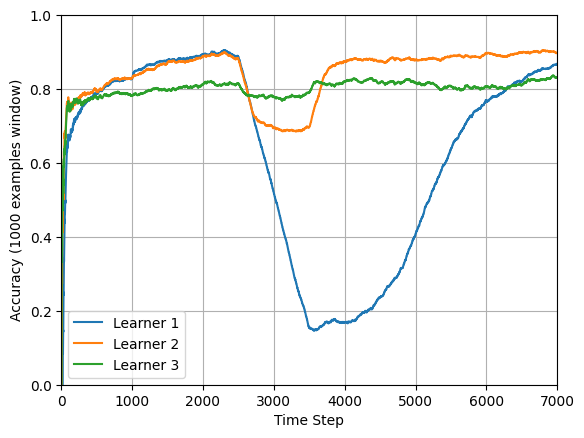

In [82]:
from datetime import datetime
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
for i in range(n_models):
    # ax.plot(range(1, n_samples + 1), metrics_cum_list[i][0], label=f"Accuracy {i+1}")
    ax.plot(range(1, n_samples + 1), metrics_cum_list[i][1], label=f"Learner {i+1}")
ax.set_xlim(0, n_samples)
ax.set_ylim(0, 1)
ax.set_xlabel("Time Step")
ax.set_ylabel("Accuracy (1000 examples window)")
# ax.set_title("Graph title")
ax.legend()
ax.grid()
#fig.show()
print(f"Executed {datetime.now()}")

Executed 2023-08-27 13:45:14.344057


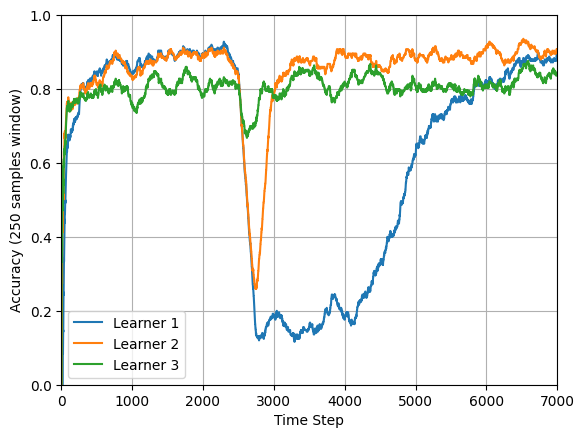

In [83]:
from datetime import datetime
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
for i in range(n_models):
    # ax.plot(range(1, n_samples + 1), metrics_cum_list[i][0], label=f"Accuracy {i+1}")
    ax.plot(range(1, n_samples + 1), metrics_cum_list[i][2], label=f"Learner {i+1}")
ax.set_xlim(0, n_samples)
ax.set_ylim(0, 1)
ax.set_xlabel("Time Step")
ax.set_ylabel("Accuracy (250 samples window)")
# ax.set_title("Graph title")
ax.legend()
ax.grid()
#fig.show()
print(f"Executed {datetime.now()}")

In [42]:
print(dataset)
print(model_list)

Synthetic data generator

    Name  ConceptDriftStream   
    Task  Binary classification
 Samples  ∞                    
Features  4                    
 Outputs  1                    
 Classes  2                    
  Sparse  False                

Configuration:
      stream                Synthetic data generator

                  Name  Sine                 
                  Task  Binary classification
               Samples  ∞                    
              Features  4                    
               Outputs  1                    
               Classes  2                    
                Sparse  False                

              Configuration
              -------------
              classification_function  0   
                                 seed  None
                      balance_classes  True
                            has_noise  True
drift_stream                Synthetic data generator

                  Name  Sine                 
                  Task  B

Executed 2023-08-26 18:23:32.922758


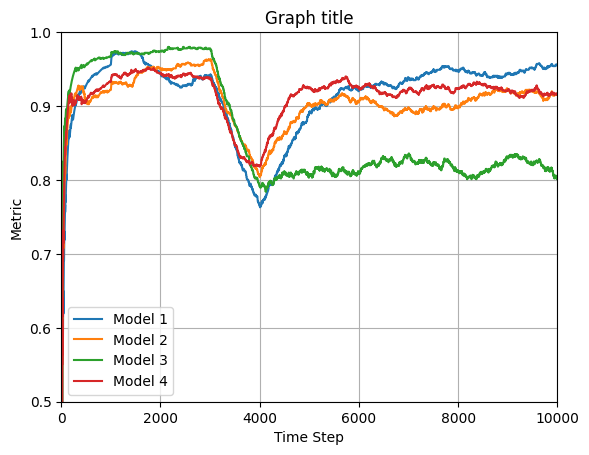

In [41]:
from datetime import datetime
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
for i in range(n_models):
    ax.plot(range(1, n_samples + 1), metrics_cum_list[i][0], label=f"Model {i+1}")
ax.set_xlim(0, n_samples)
ax.set_ylim(0.5, 1)
ax.set_xlabel("Time Step")
ax.set_ylabel("Metric")
ax.set_title("Graph title")
ax.legend()
ax.grid()
#fig.show()
print(f"Executed {datetime.now()}")

In [30]:
print(dataset)
print(model_list)

Synthetic data generator

    Name  ConceptDriftStream   
    Task  Binary classification
 Samples  ∞                    
Features  4                    
 Outputs  1                    
 Classes  2                    
  Sparse  False                

Configuration:
      stream                Synthetic data generator

                  Name  Sine                 
                  Task  Binary classification
               Samples  ∞                    
              Features  4                    
               Outputs  1                    
               Classes  2                    
                Sparse  False                

              Configuration
              -------------
              classification_function  2   
                                 seed  None
                      balance_classes  True
                            has_noise  True
drift_stream                Synthetic data generator

                  Name  Sine                 
                  Task  B

Executed 2023-08-26 18:20:07.695595


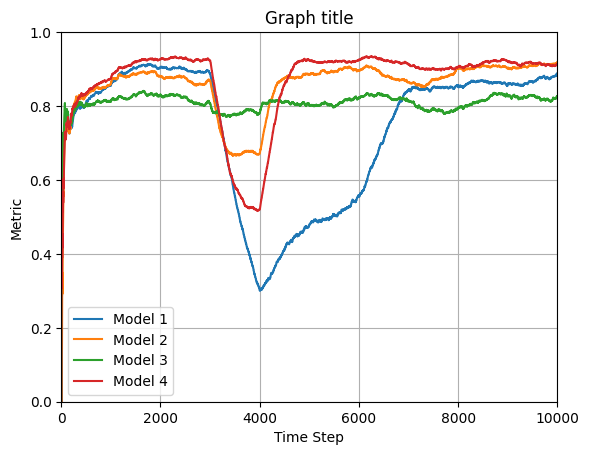

In [29]:
from datetime import datetime
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
for i in range(n_models):
    ax.plot(range(1, n_samples + 1), metrics_cum_list[i][0], label=f"Model {i+1}")
ax.set_xlim(0, n_samples)
ax.set_ylim(0, 1)
ax.set_xlabel("Time Step")
ax.set_ylabel("Metric")
ax.set_title("Graph title")
ax.legend()
ax.grid()
# fig.show()
print(f"Executed {datetime.now()}")